# **Data set 2- Data Preprocessing**

In [24]:
## load csv file from cloud drive
from google.colab import drive
drive.mount('/content/drive/')
data_path = "/content/drive/MyDrive/Colab Notebooks/"  # this is your drive

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")
# Loading the datasets
df1 = pd.read_csv(data_path +"Dataset of Diabetes .csv")

In [31]:
# last five records in the second dataframe
df1.tail()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y
999,248,24054,M,54,5.0,67,6.9,3.8,1.7,1.1,3.0,0.7,33.0,Y


#  Handling Missing Data

In [27]:
# Checking for missing values in data set 2
print("Missing values before handling:\n", df1.isnull().sum())

Missing values before handling:
 ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


#  Normalization & Standardization
 Since our dataset contains numeric values with different scales and also categorical values, first, we deal with the categorical values and turn them into numeric value, then we normalize them to ensure equal weight during model training.

In [19]:
from sklearn.impute import SimpleImputer

# split categorical columns and numeric columns
numeric_cols = df1.select_dtypes(include=['number']).columns
categorical_cols = df1.select_dtypes(exclude=['number']).columns

# process data type
imputer_numeric = SimpleImputer(strategy="median")
df1[numeric_cols] = imputer_numeric.fit_transform(df1[numeric_cols])

# print to check if missing values are processed
print("\nMissing values after handling:\n", df1.isnull().sum())


Missing values after handling:
 ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


# Encoding Categorical Variables


In [33]:
print(df1['CLASS'].unique())  # check unique values in CLASS column
print(df1['CLASS'].value_counts())  # check the sum of values in CLASS column

['N' 'N ' 'P' 'Y' 'Y ']
CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64


In [34]:
DF = df1.copy()
# Convert categorical column "Gender" into numeric
DF['Gender'] = df1['Gender'].map({'M': 1, 'F': 0, 'f':0})
# Convert categorical column "CLASS" into numeric
DF['CLASS'] = df1['CLASS'].map({'N':0,'N ':0,'Y ':1,'Y':1,'P':2})

DF.tail()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
995,200,454317,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,1
996,671,876534,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,1
997,669,87654,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,1
998,99,24004,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,1
999,248,24054,1,54,5.0,67,6.9,3.8,1.7,1.1,3.0,0.7,33.0,1


In [36]:
print(DF['CLASS'].unique())  # check if the cate-2-num process went smoothly well
print(DF['CLASS'].value_counts())  # check distribution of new CLASS column

[0 2 1]
CLASS
1    844
0    103
2     53
Name: count, dtype: int64


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
DF_scaled = DF.copy()
DF_scaled.iloc[:, :-1] = scaler.fit_transform(DF.iloc[:, :-1])  # Scale all except target

# Display first few rows of scaled data
DF_scaled.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0.672140,-0.074747,-1.139671,-0.401144,-0.144781,-0.382672,-1.334983,-0.509436,-1.035084,1.810756,-1.085457,-0.369958,-1.124622,0
1,1.641852,-0.069940,0.877446,-3.130017,-0.212954,-0.115804,-1.334983,-0.893730,-0.678063,-0.158692,-0.457398,-0.342649,-1.326239,0
2,0.330868,-0.065869,-1.139671,-0.401144,-0.144781,-0.382672,-1.334983,-0.509436,-1.035084,1.810756,-1.085457,-0.369958,-1.124622,0
3,1.412950,-0.054126,-1.139671,-0.401144,-0.144781,-0.382672,-1.334983,-0.509436,-1.035084,1.810756,-1.085457,-0.369958,-1.124622,0
4,0.680463,-0.069939,0.877446,-2.334096,0.673299,-0.382672,-1.334983,0.028576,-0.963680,-0.613180,-0.547121,-0.397267,-1.729472,0


#  Feature Selection: Identifying Most Predictive Variables
 We will use ExtraTreesClassifier to check feature importance.

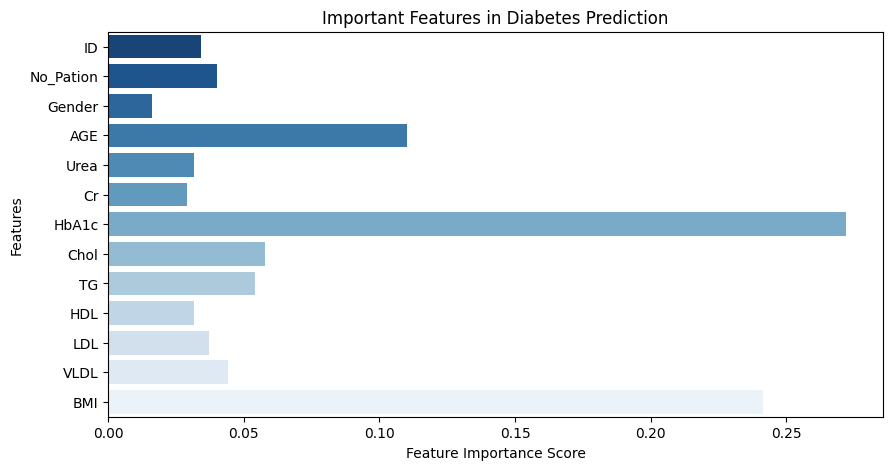

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

X = DF.drop(columns=['CLASS'])  # Features
y = DF['CLASS']  # Target

# Feature Importance using ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=model.feature_importances_, y=X.columns, palette="Blues_r")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Important Features in Diabetes Prediction")
plt.show()


# Exploratory Data Analysis (EDA)

We will visualize the distribution of some features using histograms and pie charts.


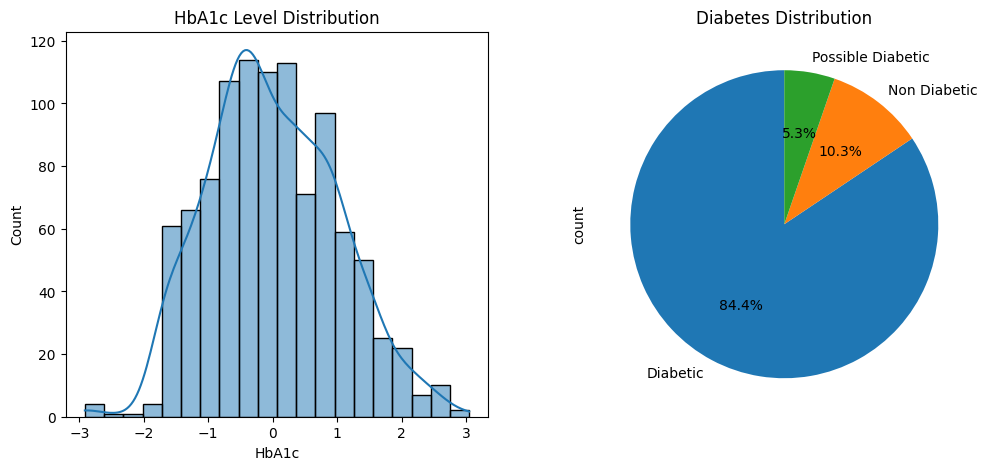

In [42]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# A histogram of Glucose Levels
sns.histplot(DF_scaled['HbA1c'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("HbA1c Level Distribution")

#  Pie Chart for Diabetes Class Distribution
DF['CLASS'].value_counts().plot.pie(
    autopct='%1.1f%%', labels=["Diabetic", "Non Diabetic","Possible Diabetic"], startangle=90, ax=axes[1])
axes[1].set_title("Diabetes Distribution")

plt.show()


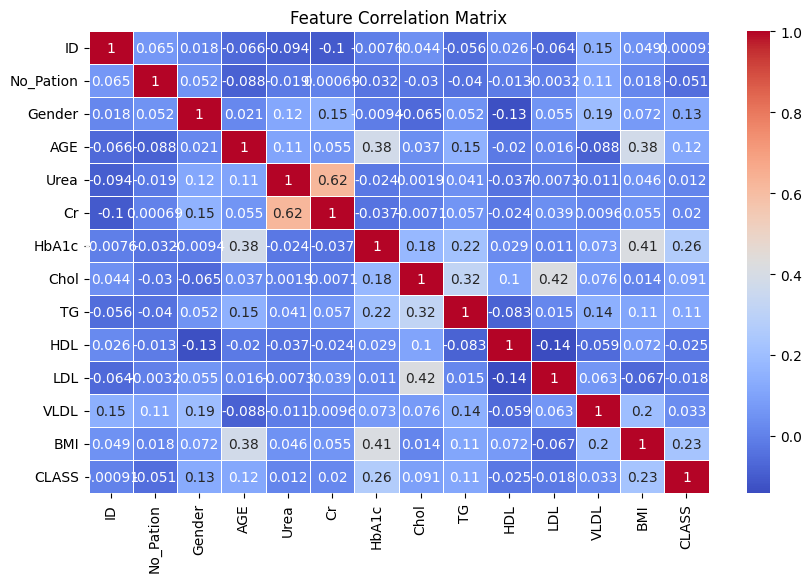

In [43]:
#  Correlation Matrix: Finding Relationships Between Features
# A correlation heatmap helps in understanding how features are related.

plt.figure(figsize=(10, 6))
sns.heatmap(DF.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [45]:
#save the preprocessed data set in csv file
DF.to_csv(data_path +'cleaned_dataset2.csv', index=False)